In [1]:
### This downloads and extracts the bank of england real rate historical data from
### https://www.bankofengland.co.uk/statistics/yield-curves
### then plots 

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [2]:
#extract the file and close the link

url ='https://www.bankofengland.co.uk/-/media/boe/files/statistics/yield-curves/glcrealddata.zip'
resp = urlopen(url)
zipfile = ZipFile(BytesIO(resp.read()))
resp.close()

In [3]:
#look up the filenames in the zipfile
display(pd.DataFrame([[name] for i,name in enumerate(zipfile.namelist())],columns=["File Name"]))

,File Name
0,GLC Real daily data_1985 to 1989.xlsx
1,GLC Real daily data_1990 to 1994.xlsx
2,GLC Real daily data_1995 to 1999.xlsx
3,GLC Real daily data_2000 to 2004.xlsx
4,GLC Real daily data_2005 to 2015.xlsx
5,GLC Real daily data_2016 to present.xlsx


In [4]:
#extract file number 5
file_number = 5

extracted_file = zipfile.open(zipfile.namelist()[file_number])
data=pd.read_excel(extracted_file,sheet_name="4. spot curve",skiprows=3,index_col=0)
zipfile.close()

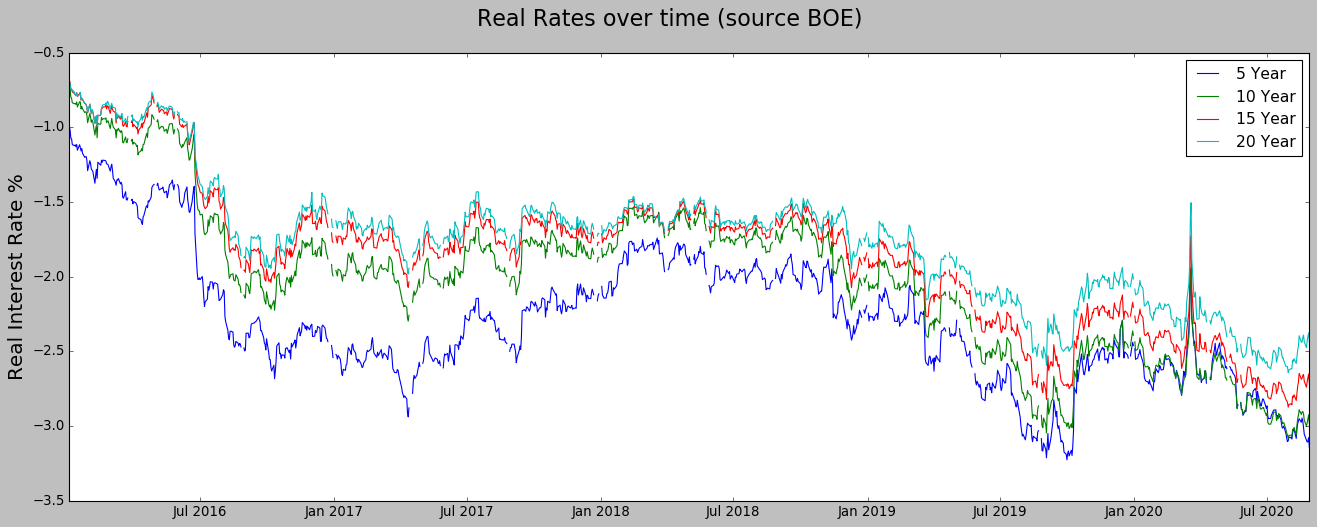

In [5]:
#plot 5-20 year movements
plt.style.use('classic')
fig,ax = plt.subplots(figsize=(20,7))
fig.suptitle("Real Rates over time (source BOE)",fontsize=20)
ax.plot(data[5.0][2:],label="5 Year")
ax.plot(data[10.0][2:],label="10 Year")
ax.plot(data[15.0][2:],label="15 Year")
ax.plot(data[20.0][2:],label="20 Year")
plt.legend(loc=1, prop={'size': 14})
ylabel = ax.set_ylabel('Real Interest Rate %')
ylabel.set_fontsize(18)


In [6]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
